In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

In [2]:
raw_data1=pd.read_csv("data/alltweets.csv",index_col=0)
raw_data2=pd.read_csv("data/alltweets2.csv",index_col=0)
raw_data3=pd.read_csv("data/alltweets3.csv",index_col=0)
raw_data4=pd.read_csv("data/alltweets4.csv",index_col=0)

In [3]:
raw_data=pd.concat([raw_data1,raw_data2,raw_data3,raw_data4])

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481785 entries, 0 to 402810
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Datetime  1481785 non-null  object
 1   Tweet Id  1481785 non-null  int64 
 2   Text      1481785 non-null  object
 3   Username  1481785 non-null  object
 4   hashtag   1481785 non-null  object
dtypes: int64(1), object(4)
memory usage: 67.8+ MB


In [5]:
raw_data.sample(10)

,Datetime,Tweet Id,Text,Username,hashtag
175766,2021-12-26 23:00:04+00:00,1475240023633108996,"The current price of one DOGE is now: $0.1917,...",Dogecoinvalue,$doge
130438,2021-12-12 15:56:20+00:00,1470059953973075970,$ADA / $USD — 1W\nRed candles have broken your...,TheMoneyRaccoon,$ada
138855,2021-12-09 10:40:51+00:00,1468893396567662592,@OfficialTravlad $LEOS or $BNB,PJS0322,$bnb
390863,2021-12-23 18:15:36+00:00,1474081269143252997,Look what I found! FordMod collectible https:/...,TRNSDNCE_STUDIO,ethereum
283094,2021-12-13 11:45:44+00:00,1470359276673658882,@pillarwallet @0xPolygon @paraswap Very good p...,Robin54638106,$matic
111912,2021-12-23 11:37:01+00:00,1473980962585210880,$mdt ok people lets #hold and not sell less th...,AgeingTrex,$avax
50946,2021-12-21 15:07:39+00:00,1473309196741328897,Happy #TIPPINGTUESDAY\n#DOGECOIN\n#dogearmy\n#...,StocksRocksn,dogecoin
166575,2021-12-06 19:53:37+00:00,1467945342809391110,@scientiaax @avalancheavax @avalabsofficial @e...,mny66_,$avax
408989,2021-12-22 19:21:54+00:00,1473735565514362888,"I've just created ""Selene"" collectible! https:...",Corvusx_Art,ethereum
173187,2021-12-21 17:43:25+00:00,1473348397021159435,@BNB6868 Time for other strong coins to start ...,Fernand51301913,binance coin


In [6]:
data=raw_data.copy()

In [7]:
count_by_hashtag=data.groupby("hashtag").sum()

In [8]:
dollar_sign_hashtag=[x for x in count_by_hashtag.index if "$" in x]
name_sign_hashtag=[x for x in count_by_hashtag.index if "$" not in x]

In [9]:
dollar_count_by_hashtag=count_by_hashtag.loc[dollar_sign_hashtag]
name_count_by_hashtag=count_by_hashtag.loc[name_sign_hashtag]


In [10]:
dollar_count_by_hashtag

,Tweet Id
hashtag,
$ada,1.471041e+23
$avax,1.273219e+23
$bnb,9.130391e+22
$doge,1.337523e+23
$dot,1.038512e+23
$eth,1.474289e+23
$matic,1.472407e+23
$ont,3.797041e+21
$sol,1.472863e+23


In [11]:
name_count_by_hashtag

,Tweet Id
hashtag,
avalanche,1.472397e+23
binance coin,5.987215e+22
cardano,1.472925e+23
cordano,9.015426e+20
dogecoin,1.473312e+23
ethereum,1.474429e+23
ontology,1.115267e+22
polkadot,8.600301e+22
polygon,1.473351e+23


In [12]:
coin_list={"avalanche":["$avax","avalanche","avalanche-2"],
           "cardano":["$ada","cardano","cardano"],
           "dogecoin":["$doge","dogecoin","dogecoin"],
           "ethereum":["$eth","ethereum","ethereum"],
           "ontology":["$ont","ontology","ontology"],
           "polkadot":["$dot","polkadot","polkadot"],
           "solana":["$sol","solana","solana"],
           "uniswap":["$uni","uniswap","uniswap"],
           "binance coin":["$bnb","binance coin","binancecoin"],
           "polygon":["$matic","polygon","matic-network"]}

In [13]:
def coin_name(hashtag):
    for key,value in coin_list.items():
        if value[0]==hashtag:
            name=key
            break
        elif value[1]==hashtag:
            name=key
            break
        else:
            name=None
    return name

In [14]:
coin_name("$dot")

'polkadot'

In [15]:
number_of_tweets_list=[]
for i in dollar_count_by_hashtag.index:
    number_of_tweets_dict={}
    number_of_tweets_dict["name"]=coin_name(i)
    number_of_tweets_dict["name_hashtag"]=name_count_by_hashtag.loc[coin_name(i)]["Tweet Id"]
    number_of_tweets_dict["$_hashtag"]=dollar_count_by_hashtag.loc[i]["Tweet Id"]
    number_of_tweets_list.append(number_of_tweets_dict)

In [16]:
number_of_tweets=pd.DataFrame(number_of_tweets_list)

In [17]:
number_of_tweets

,name,name_hashtag,$_hashtag
0,cardano,1.472925e+23,1.471041e+23
1,avalanche,1.472397e+23,1.273219e+23
2,binance coin,5.987215e+22,9.130391e+22
3,dogecoin,1.473312e+23,1.337523e+23
4,polkadot,8.600301e+22,1.038512e+23
5,ethereum,1.474429e+23,1.474289e+23
6,polygon,1.473351e+23,1.472407e+23
7,ontology,1.115267e+22,3.797041e+21
8,solana,1.474336e+23,1.472863e+23
9,uniswap,7.016276e+22,2.039235e+22


In [18]:
data=data[data["hashtag"]!="cordano"]

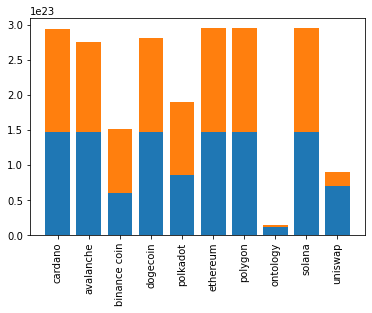

In [19]:
plt.bar(number_of_tweets["name"],number_of_tweets["name_hashtag"])
plt.bar(number_of_tweets["name"],number_of_tweets["$_hashtag"],bottom=number_of_tweets["name_hashtag"])

plt.xticks(rotation=90)
plt.show()

In [20]:
data["coin"]=data["hashtag"].apply(coin_name)

In [21]:
data["Datetime"]=pd.to_datetime(data["Datetime"])

In [22]:
data[data["coin"].isnull()]

,Datetime,Tweet Id,Text,Username,hashtag,coin


# Data Date Ranges by coin

 Data set covers tweets which are post in December 2021. But for the limitation of scrapping, we can only covers 100,000 tweets per hashtag. So some hashtags do not start from begining of the year. Which are:
 <ul>
    <li>Ethereum</li>
    <li>Solana</li>
    <li>Polygon</li>
 </ul>
 
we think 200,000(100,000 comes from $ hashtags and 100,000 comes from name) is enough to evolute hourly NLP anaylsis.

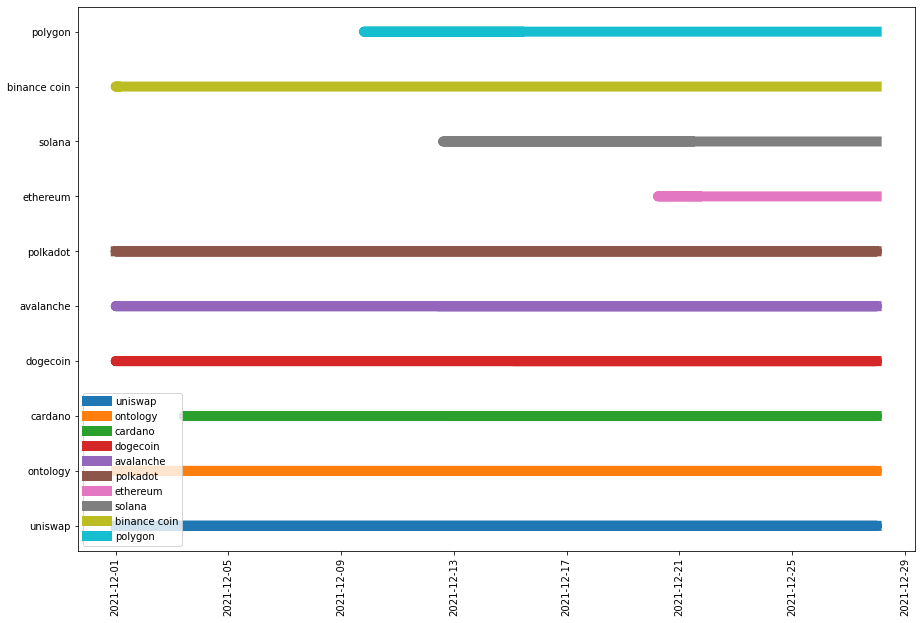

In [23]:
plt.figure(figsize=(15,10))
for i,coin in enumerate(data.coin.unique()):
    coin_i=data[data["coin"]==coin]
    plt.plot(coin_i["Datetime"],np.full(len(coin_i),i),label=coin,linewidth=10)
plt.legend()
plt.xticks(rotation=90)
plt.yticks([0,1,2,3,4,5,6,7,8,9],data.coin.unique())
plt.show()

### Hourtly Number of Tweets per coins

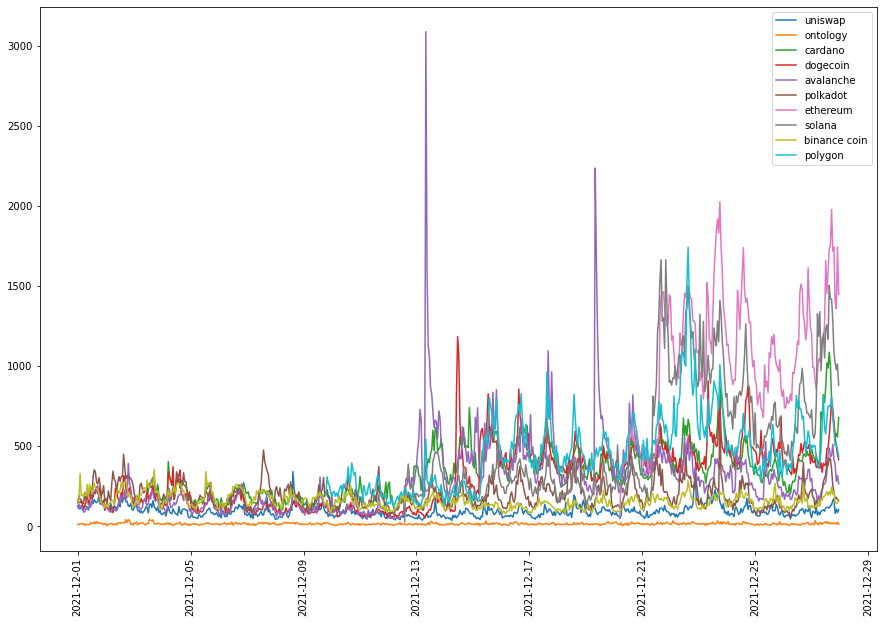

In [24]:
plt.figure(figsize=(15,10))
for i,coin in enumerate(data.coin.unique()):
    coin_i=data[data["coin"]==coin]
    group_by_date=coin_i.groupby(pd.Grouper(key='Datetime',freq='1H')).count()
    plt.plot(group_by_date.index,group_by_date["Tweet Id"],label=coin)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Visualisation of Coins' price and volume vs Number of Tweets

In [25]:
def graph_coin(coin_name,timeframe="hourly"):
    
    print("********************{}*****************".format(coin_name))
    coin_id=coin_list[coin_name][2]
    coin_name=coin_list[coin_name][1]

    #filter coin data
    coin_data=data[data["coin"]==coin_name]
    #coin price and volume data from coingecko
    coin_ohlcv=requests.get("https://api.coingecko.com/api/v3/coins/{}/market_chart?vs_currency=usd&days=30&interval={}".format(coin_id,timeframe)).json()

    
    #arrange coin price and volume
    coin_price=np.array(coin_ohlcv["prices"])
    coin_price=pd.DataFrame(coin_price,columns=["Datetime","price"])  
    coin_price["Datetime"]=pd.to_datetime(coin_price["Datetime"].apply(lambda x:datetime.fromtimestamp(x/1000)) ,utc = True)   
    #coin_price["Datetime"]=coin_price["Datetime"].apply(lambda x:x..replace(minute=0, second=0))    
    coin_price["price_change"]=coin_price["price"].pct_change()
    coin_price["volume"]=np.array(coin_ohlcv["total_volumes"])[:,1]
    coin_price["volume_change"]=coin_price["volume"].pct_change()
    

    if timeframe=="hourly":
        freq="1H"
    elif timeframe=="daily":
        freq="1D"
    
    group_by_date=coin_data.groupby(pd.Grouper(key='Datetime',freq=freq)).count()
    group_by_date.reset_index(inplace=True)
    
    
    coin_price.Datetime=coin_price.Datetime.dt.floor('H')

    coin_tweet_price=pd.merge(group_by_date,coin_price,on="Datetime",how="left")
    
    
    price_corr=np.corrcoef(coin_tweet_price["price"],coin_tweet_price["Tweet Id"])
    print("Price vs Number of Tweet correlation: {:.3f}".format(price_corr[0][1]))

    price_change_corr=np.corrcoef(coin_tweet_price["price_change"],coin_tweet_price["Tweet Id"])
    print("Price Change vs Number of Tweet correlation: {:.3f}".format(price_change_corr[0][1]))

    volume_corr=np.corrcoef(coin_tweet_price["volume"],coin_tweet_price["Tweet Id"])
    print("Volume vs Number of Tweet correlation: {:.3f}".format(volume_corr[0][1]))
    
    volume_change_corr=np.corrcoef(coin_tweet_price["volume_change"],coin_tweet_price["Tweet Id"])
    print("Volume Change vs Number of Tweet correlation: {:.3f}".format(volume_change_corr[0][1]))

    
    #graph
    
    fig,ax=plt.subplots(2,2,figsize=(15,10))

    
    #Graph 0 0 
    ax[0,0].plot(coin_tweet_price["Datetime"],coin_tweet_price["Tweet Id"],label="Number of Tweet")
    ax_twinx_0_0=ax[0,0].twinx()
    ax_twinx_0_0.plot(coin_tweet_price["Datetime"],coin_tweet_price["price"],label=f"{coin_name} Price",color="red")
    ax[0,0].legend(loc="upper left")
    ax_twinx_0_0.legend(loc="upper right")
    ax[0,0].tick_params(axis="x",rotation=45)

    #Graph 0 1
    ax[0,1].plot(coin_tweet_price["Datetime"],coin_tweet_price["Tweet Id"],label="Number of Tweet")
    ax_twinx_0_1=ax[0,1].twinx()
    ax_twinx_0_1.plot(coin_tweet_price["Datetime"],coin_tweet_price["volume"],label=f"{coin_name} Volume",color="red")
    ax[0,1].legend(loc="upper left")
    ax_twinx_0_1.legend(loc="upper right")
    ax[0,1].tick_params(axis="x",rotation=45)

    #Graph 1 0
    ax[1,0].plot(coin_tweet_price["Datetime"],coin_tweet_price["Tweet Id"],label="Number of Tweet")
    ax_twinx_1_0=ax[1,0].twinx()
    ax_twinx_1_0.plot(coin_tweet_price["Datetime"],coin_tweet_price["price_change"],label=f"{coin_name} Price",color="red")
    ax[1,0].legend(loc="upper left")
    ax_twinx_1_0.legend(loc="upper right")
    ax[1,0].tick_params(axis="x",rotation=45)


    #Graph 1 1
    ax[1,1].plot(coin_tweet_price["Datetime"],coin_tweet_price["Tweet Id"],label="Number of Tweet")
    ax_twinx_1_1=ax[1,1].twinx()
    ax_twinx_1_1.plot(coin_tweet_price["Datetime"],coin_tweet_price["volume_change"],label=f"{coin_name} Volume",color="red")
    ax[1,1].legend(loc="upper left")
    ax_twinx_1_1.legend(loc="upper right")
    ax[1,1].tick_params(axis="x",rotation=45)

    plt.show()
    print("********************************************************")

********************avalanche*****************
Price vs Number of Tweet correlation: nan
Price Change vs Number of Tweet correlation: nan
Volume vs Number of Tweet correlation: nan
Volume Change vs Number of Tweet correlation: nan


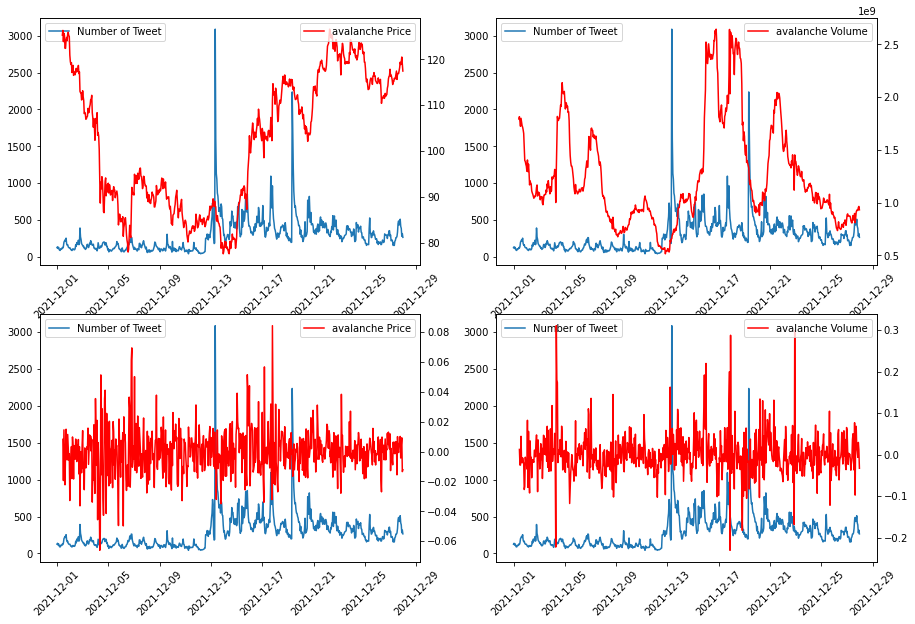

********************************************************
********************cardano*****************
Price vs Number of Tweet correlation: -0.047
Price Change vs Number of Tweet correlation: 0.074
Volume vs Number of Tweet correlation: -0.425
Volume Change vs Number of Tweet correlation: 0.180


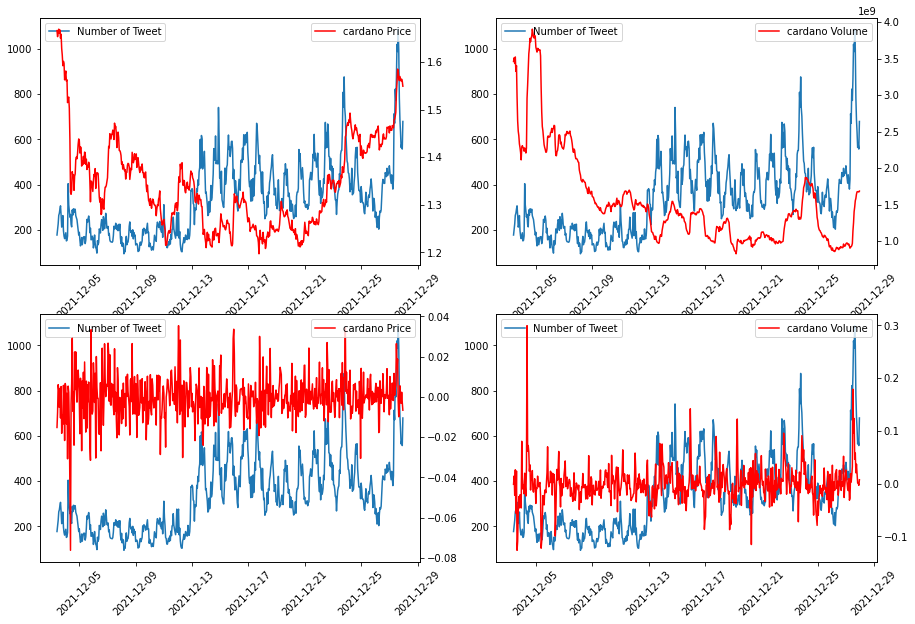

********************************************************
********************dogecoin*****************
Price vs Number of Tweet correlation: nan
Price Change vs Number of Tweet correlation: nan
Volume vs Number of Tweet correlation: nan
Volume Change vs Number of Tweet correlation: nan


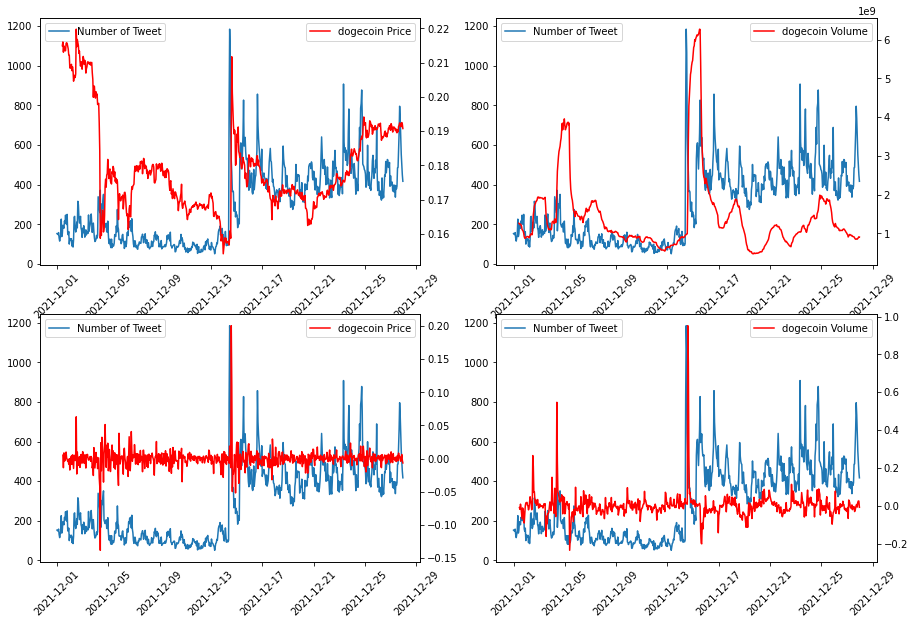

********************************************************
********************ethereum*****************
Price vs Number of Tweet correlation: 0.413
Price Change vs Number of Tweet correlation: 0.001
Volume vs Number of Tweet correlation: -0.419
Volume Change vs Number of Tweet correlation: -0.087


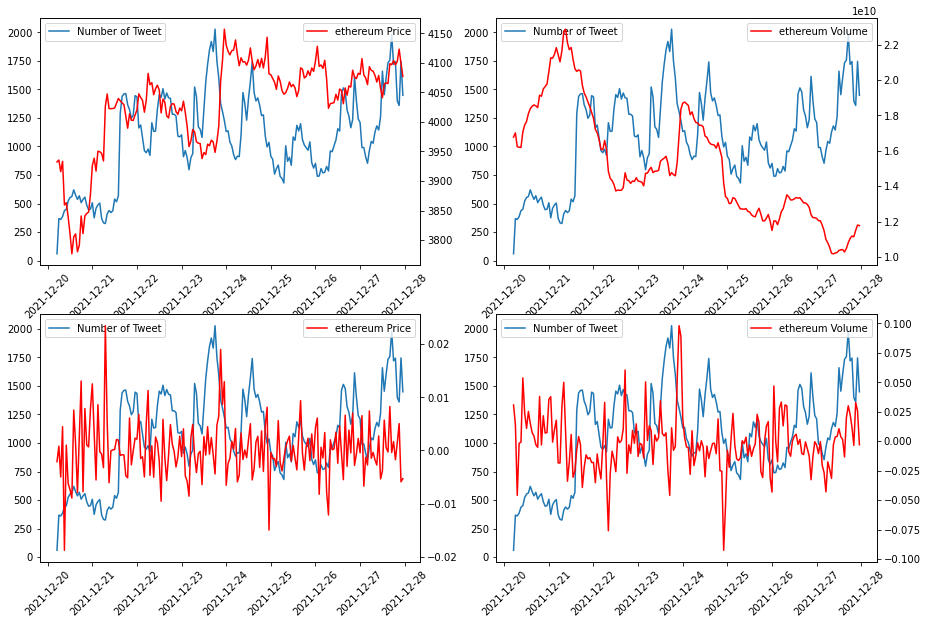

********************************************************
********************ontology*****************
Price vs Number of Tweet correlation: nan
Price Change vs Number of Tweet correlation: nan
Volume vs Number of Tweet correlation: nan
Volume Change vs Number of Tweet correlation: nan


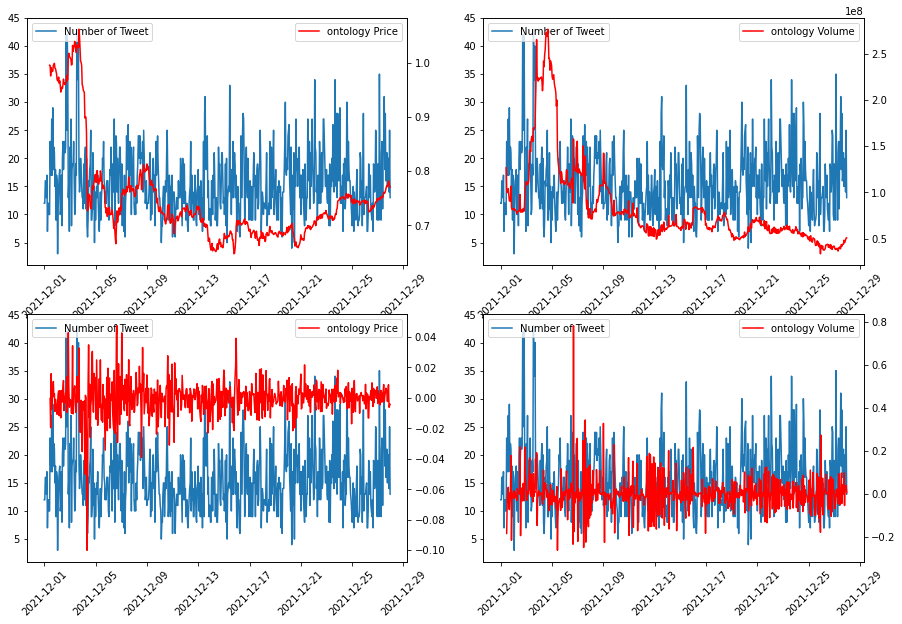

********************************************************
********************polkadot*****************
Price vs Number of Tweet correlation: nan
Price Change vs Number of Tweet correlation: nan
Volume vs Number of Tweet correlation: nan
Volume Change vs Number of Tweet correlation: nan


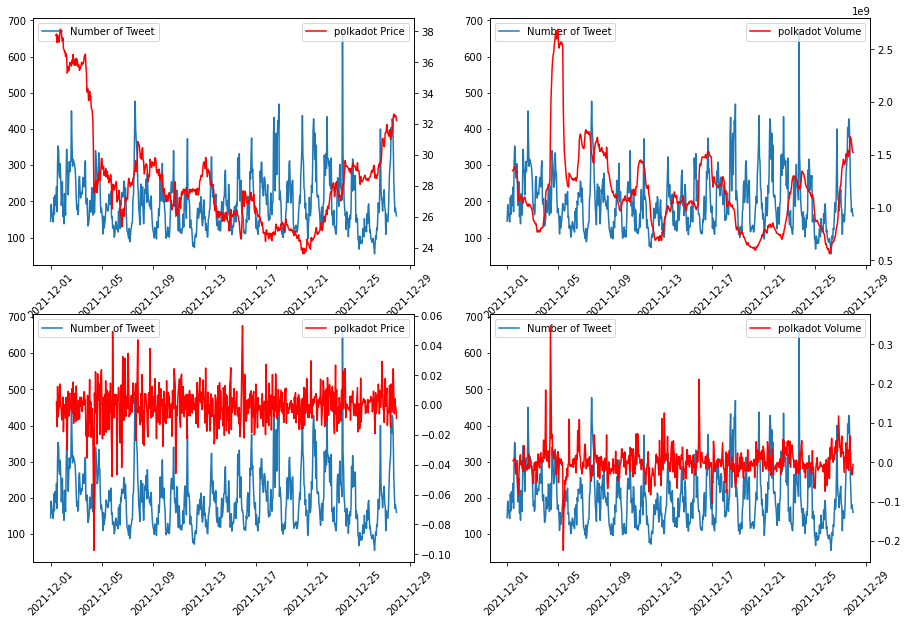

********************************************************
********************solana*****************
Price vs Number of Tweet correlation: 0.522
Price Change vs Number of Tweet correlation: 0.033
Volume vs Number of Tweet correlation: -0.293
Volume Change vs Number of Tweet correlation: -0.011


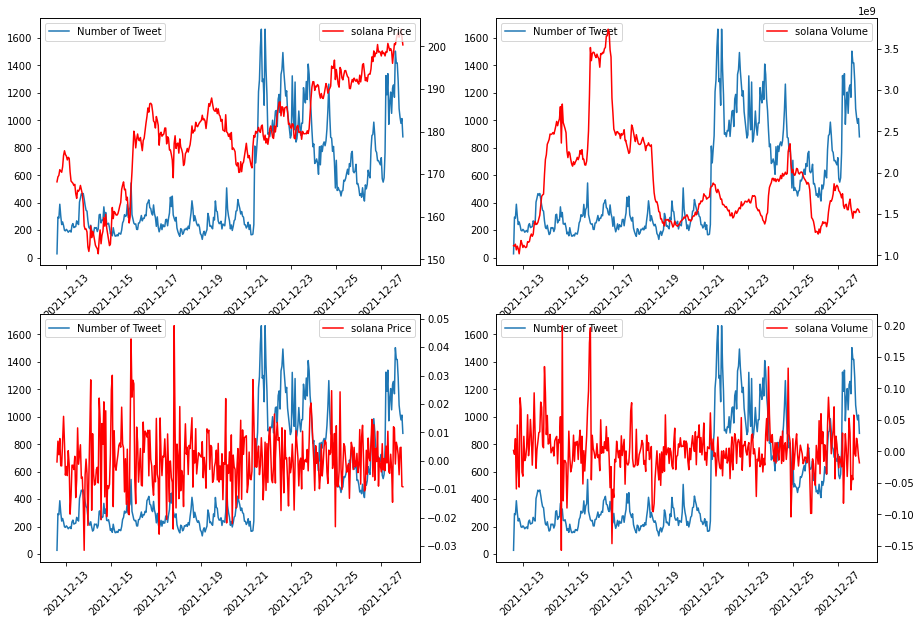

********************************************************
********************uniswap*****************
Price vs Number of Tweet correlation: nan
Price Change vs Number of Tweet correlation: nan
Volume vs Number of Tweet correlation: nan
Volume Change vs Number of Tweet correlation: nan


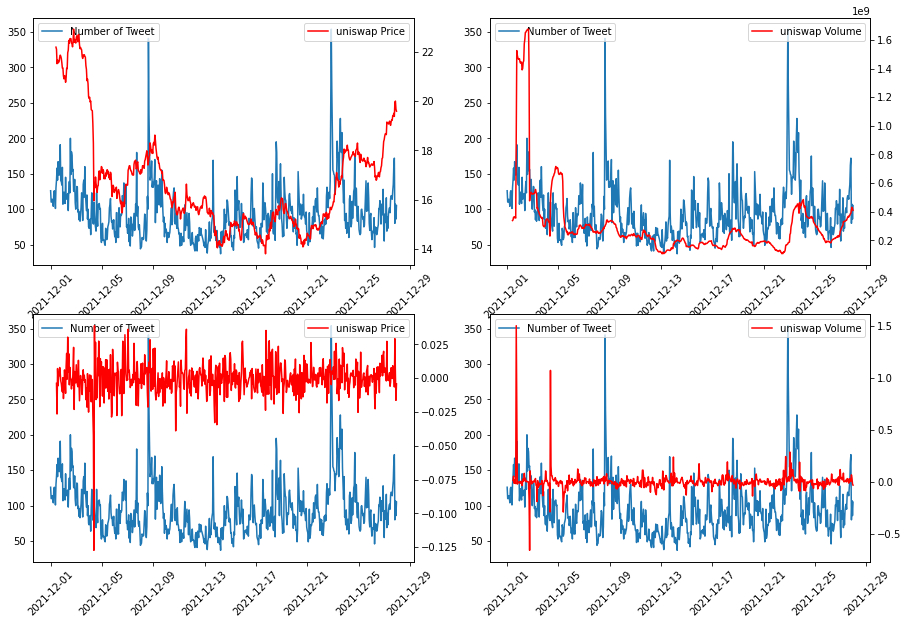

********************************************************
********************binance coin*****************
Price vs Number of Tweet correlation: nan
Price Change vs Number of Tweet correlation: nan
Volume vs Number of Tweet correlation: nan
Volume Change vs Number of Tweet correlation: nan


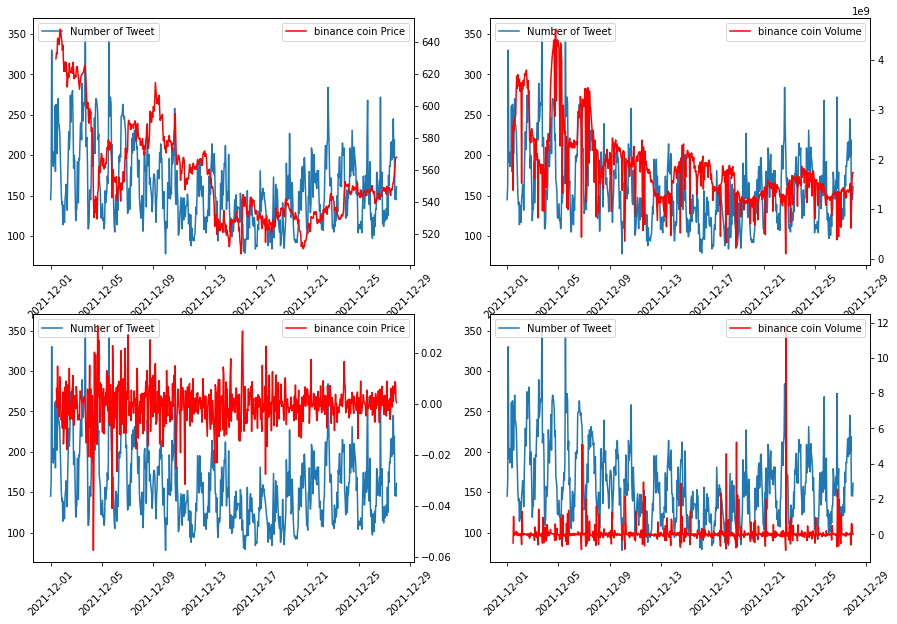

********************************************************
********************polygon*****************
Price vs Number of Tweet correlation: 0.489
Price Change vs Number of Tweet correlation: 0.043
Volume vs Number of Tweet correlation: 0.194
Volume Change vs Number of Tweet correlation: 0.086


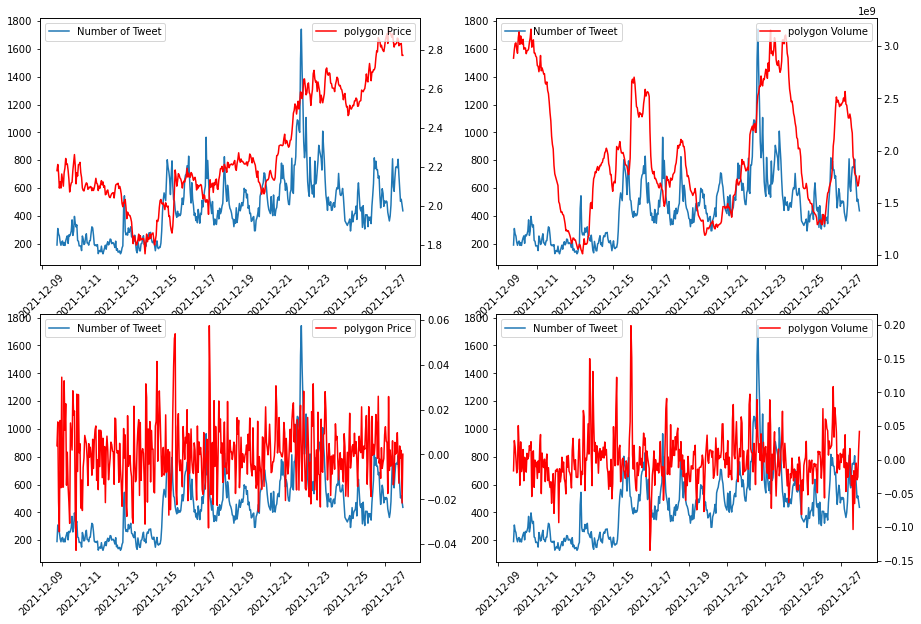

********************************************************


In [26]:
for i in coin_list.keys():
    graph_coin(i)

In [27]:
coin_ohlcv=requests.get("https://api.coingecko.com/api/v3/coins/{}/market_chart?vs_currency=usd&days=30&interval={}".format("ethereum","hourly")).json()
    
#arrange coin price and volume
coin_price=np.array(coin_ohlcv["prices"])
coin_price=pd.DataFrame(coin_price,columns=["Datetime","price"])  
coin_price["Datetime"]=coin_price["Datetime"].apply(lambda x: datetime.fromtimestamp(x/1000))
coin_price["price_change"]=coin_price["price"].pct_change()
coin_price["volume"]=np.array(coin_ohlcv["total_volumes"])[:,1]
coin_price["volume_change"]=coin_price["volume"].pct_change()

In [28]:
coin_price["Datetime"].iloc[0]

Timestamp('2021-12-01 09:01:17.497000')

In [29]:
datetime.fromtimestamp(coin_price["Datetime"].iloc[0]/1000)

TypeError: unsupported operand type(s) for /: 'Timestamp' and 'int'

In [ ]:
avax_ohlcv=requests.get("https://api.coingecko.com/api/v3/coins/cardano/market_chart?vs_currency=usd&days=30&interval=hourly").json()

In [ ]:
avax_price=np.array(avax_ohlcv["prices"])
avax_price_diff=np.diff(np.append(np.array([[avax_price[:,0][0],np.mean(avax_price[:,1])]]), avax_price,axis=0)[:,1])
avax_volumes=np.array(avax_ohlcv["total_volumes"])
avax_volumes_diff=np.diff(np.append(np.array([[avax_volumes[:,0][0],np.mean(avax_volumes[:,1])]]), avax_volumes,axis=0)[:,1])


In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

group_by_date=avalanche_data.groupby(pd.Grouper(key='Datetime',freq='1H')).count()

ax[0,0].plot(group_by_date.index,group_by_date["Tweet Id"],label="Number of Tweet")
ax2=ax[0,0].twinx()
ax2.plot([datetime.fromtimestamp(x/1000) for x in avax_price[:,0]],avax_price[:,1],label="Avax Price",color="red")
ax[0,0].legend(loc="upper left")
ax2.legend(loc="upper right")
ax[0,0].tick_params(axis="x",rotation=45)

ax[0,1].plot(group_by_date.index,group_by_date["Tweet Id"],label="Number of Tweet")
ax3=ax[0,1].twinx()
ax3.plot([datetime.fromtimestamp(x/1000) for x in avax_price[:,0]],avax_volumes[:,1],label="Avax Volume",color="red")
ax[0,1].legend(loc="upper left")
ax3.legend(loc="upper right")
ax[0,1].tick_params(axis="x",rotation=45)


ax[1,0].plot(group_by_date.index,group_by_date["Tweet Id"],label="Number of Tweet")
ax4=ax[1,0].twinx()
ax4.plot([datetime.fromtimestamp(x/1000) for x in avax_price[:,0]],avax_price_diff,label="Avax Price",color="red")
ax[1,0].legend(loc="upper left")
ax4.legend(loc="upper right")
ax[1,0].tick_params(axis="x",rotation=45)


ax[1,1].plot(group_by_date.index,group_by_date["Tweet Id"],label="Number of Tweet")
ax5=ax[1,1].twinx()
ax5.plot([datetime.fromtimestamp(x/1000) for x in avax_price[:,0]],avax_volumes_diff,label="Avax Volume",color="red")
ax[1,1].legend(loc="upper left")
ax5.legend(loc="upper right")
ax[1,1].tick_params(axis="x",rotation=45)

plt.show()

### Some Tweets

In [ ]:
for i in range(10):
    avalanche_sample=avalanche_data.sample(1)
    
    print(avalanche_sample["Datetime"].values[0])
    print(avalanche_sample["Text"].values[0])
    
    print("---------------------------------------------------------------------")

# Data Cleaning
Drop tweets which:
<ul>
    <li> have tag avalanche users.</i>
    <li> are not English. </i>
    <li> have other coins name with starting "$"</li>
    

In [ ]:
import re

In [ ]:
re_text=r"Great to see the @Avalancheavax hackathon in Istanbul. Where are @kevinsekniqi and @el33th4xor?"

In [ ]:
re.findall(r"\A@[a-zA-Z]",re_text)


In [ ]:
if re.search("\A@",re_text):
    print("x")

In [ ]:
def tag_clean(tweet):
    if 